# Practical 8: Feature Selection and Dimensionality Reduction  


Upon completion of this session you should be able to:
- understand how feature selection and dimensionality reduction methods such as PCA work.
- be able to apply these methods in Python to select feature and/or reduce dimensionality.

---
- Materials in this module include resources collected from various open-source online repositories.
- Jupyter source file can be downloaded from https://github.com/gaoshangdeakin/SIT384-Jupyter
- If you found any issue/bug for this document, please submit an issue at [https://github.com/gaoshangdeakin/SIT384/issues](https://github.com/gaoshangdeakin/SIT384/issues)


---



This practical session will demonstrate feature selection and dimensionality reduction methods, such as PCA.


## Background


### Part 1 Feature Selection

1.1 [Baseline models](#1)

1.2 [Remove features with missing values](#2)

1.3 [Remove features with low variance](#3)

1.4 [Remove highly correlated features](#4)

1.5 [Univariate Feature Selection](#5)

1.6 [Recursive Feature Elimination](#6)

1.7 [Feature selection using SelectFromModel](#7)

1.8 [PCA](#8)

### Part 2 PCA and Dimensionality Reduction 

2.1 [Principal Component Analysis](#pca)

2.2 [Other Demensionality Reducting Routines](#others)


## Tasks

## Summary

---

---
## <span style="color:#0b486b">1. Feature Selection</span>


According to [wikipedia](https://en.wikipedia.org/wiki/Feature_selection), "feature selection is the process of selecting a subset of relevent features for use in model construction".  In normal circumstances, domain knowledge plays an important role.  However, sometimes we are given a binary target and 300 continuous variables "of mysterious origin" which forces us to try automatic feature selection techniques.

In this session we will explore the following feature selection and dimensionality reduction techniques:

1. Remove features with missing values
2. Remove features with low variance
3. Remove highly correlated features
4. Univariate feature selection
5. Recursive feature elimination
6. Feature selection using SelectFromModel
7. PCA



### <span style="color:#0b486b">Feature Selection vs Dimensionality Reduction</span>

Often, feature selection and dimensionality reduction are grouped together (like here in this session). While both methods are used for reducing the number of features in a dataset, there is an important difference.

Feature selection is simply selecting and excluding given features without changing them.

Dimensionality reduction transforms features into a lower dimension.

In this session we will explore the following feature selection and dimensionality reduction techniques:
Feature Selection

    Remove features with missing values
    Remove features with low variance
    Remove highly correlated features
    Univariate feature selection
    Recursive feature elimination
    Feature selection using SelectFromModel

Dimensionality Reduction

    PCA

---
<a id = "1"></a>

### <span style="color:#0b486b">1.1 Baseline Model</span>

We’ll use logistic regression as our baseline model. Dataset can be retrieved from [here](https://github.com/gaoshangdeakin/SIT384/raw/master/Feature_selection_dataset.zip) or downloaded from the corresponding week folder on clouddeakin. 

For the given dataset, you are predicting the binary target associated with each row, without overfitting to the minimal set of training examples provided.

Files

    train.csv - the training set. 250 rows.
    test.csv - the test set. 19,750 rows.
    sample_submission.csv - a sample submission file in the correct format

Columns

    id- sample id
    target- a binary target of mysterious origin.
    0-299- continuous variables.

We first split into test and train sets and scale the data: 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

print('Train Shape: ', train.shape)
print('Test Shape: ', test.shape)

train.head()

Train Shape:  (250, 302)
Test Shape:  (19750, 301)


,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


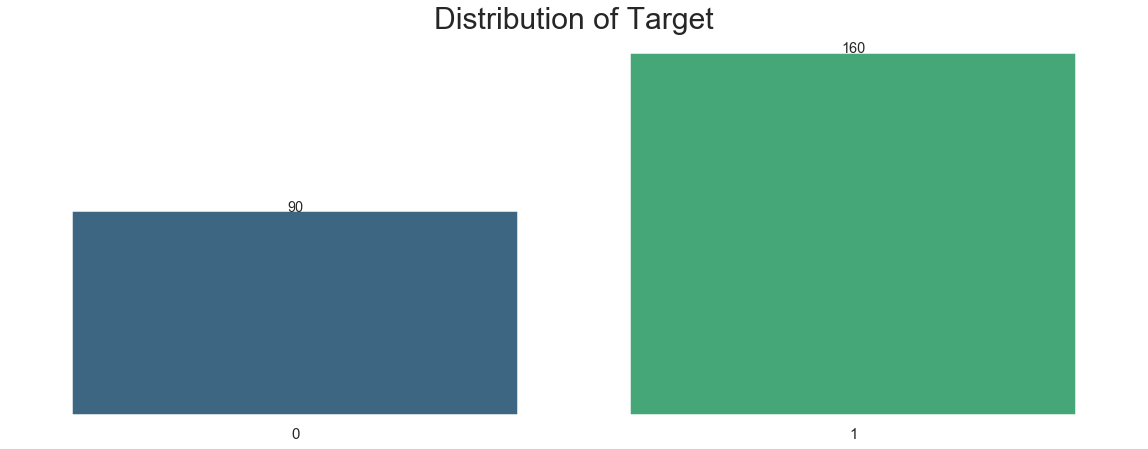

In [4]:
# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(train.target, palette='viridis')
g.set_xticklabels(['0', '1'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Target', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

#### Baseline Models
We'll use logistic regression as it is fast to train and predict and scales well.  We'll also use random forest.  With  its attribute feature_importances, we can get a sense of which features are most important.

<!--The logistic regression baseline model scored 0.666 on the public leaderboard.-->

In [5]:
# prepare for modeling
X_train_df = train.drop(['id', 'target'], axis=1)
y_train = train['target']

X_test = test.drop(['id'], axis=1)

# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test)

In [6]:
lr = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=100)

lr_scores = cross_val_score(lr,
                            X_train,
                            y_train,
                            cv=5,
                            scoring='roc_auc')
rfc_scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='roc_auc')

print('LR Scores: ', lr_scores)
print('RFC Scores: ', rfc_scores)

LR Scores:  [0.80729167 0.71875    0.734375   0.80034722 0.66319444]
RFC Scores:  [0.64496528 0.76475694 0.64409722 0.80121528 0.58506944]


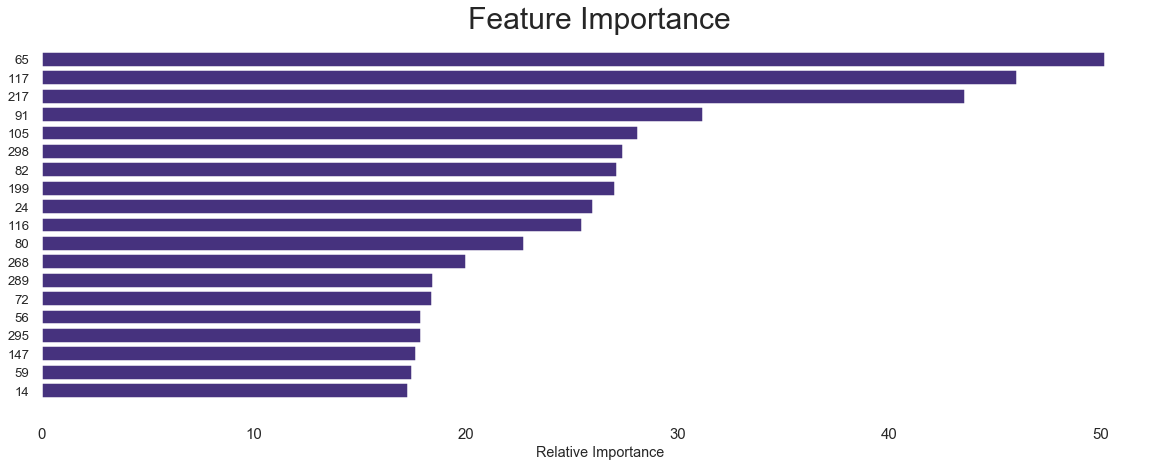

In [7]:
# checking which are the most important features
feature_importance = rfc.fit(X_train, y_train).feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-20:-1:1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
sns.despine(left=True, bottom=True)
plt.show()

While logistic regression is clearly the superior model, we can see that both modesl are likely overfitting from the fluctuating [cross validation scores](https://machinelearningmastery.com/k-fold-cross-validation/). We can apply feature selection techniques to improve model performance.

---
<a id = "2"></a>

### <span style="color:#0b486b">1.2 Remove features with missing values</span>

This one is pretty self explanatory.  First we check for missing values and then can remove columns exceeding a threshold we define.

In [8]:
# check missing values
train.isnull().any().any()

False

The dataset has no missing values and therefore no features to remove at this step.

---
<a id = "3"></a>

### <span style="color:#0b486b">1.3 Remove features with low variance</span>

In sklearn's feature selection module we find VarianceThreshold.  It removes all features whose variance doesn't meet some threshold.  By default it removes features with zero variance or features that have the same value for all samples.

In [9]:
from sklearn import feature_selection

sel = feature_selection.VarianceThreshold()
train_variance = sel.fit_transform(train)
train_variance.shape

(250, 302)

The competition description stated that our features are all continuous.  We can see from above there are no features with the same value in all columns, so we have no features to remove here.  We can revisit this technique later and consider removing features with low variance later.

<a id = "4"></a>

### <span style="color:#0b486b">1.4 Remove highly correlated features</span>

Features that are highly correlated or colinear can cause overfitting.  Here we will explore correlations among features.

In [10]:
# find correlations to target
corr_matrix = train.corr().abs()

print(corr_matrix['target'].sort_values(ascending=False).head(10))

target    1.000000
33        0.373608
65        0.293846
217       0.207215
117       0.197496
91        0.192536
24        0.173096
295       0.170501
73        0.167557
183       0.164146
Name: target, dtype: float64


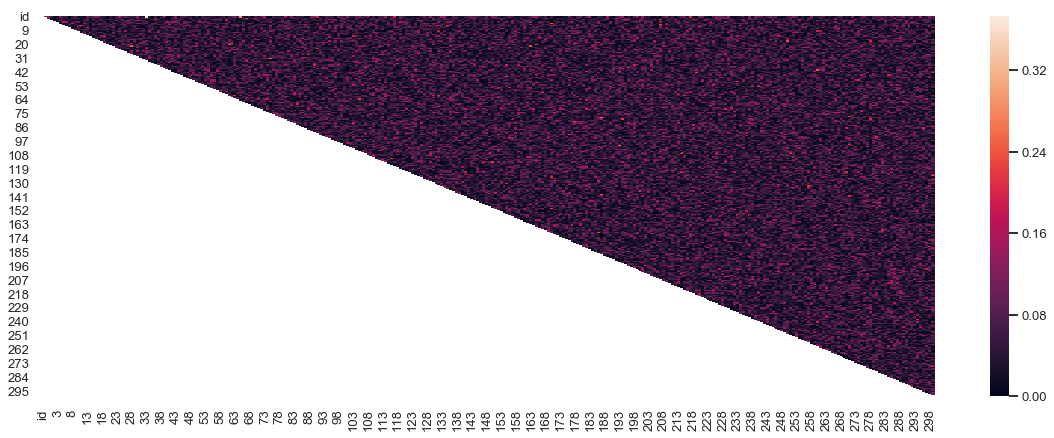

In [11]:
# Select upper triangle of correlation matrix
matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
sns.heatmap(matrix)
plt.show;

In [12]:
# Find index of feature columns with high correlation
to_drop = [column for column in matrix.columns if any(matrix[column] > 0.50)]
print('Columns to drop: ' , (len(to_drop)))

Columns to drop:  0


From the above correlation matrix we see that there are no highly correlated features in the dataset.  And even exploring correlation to target shows feature 33 with the highest correlation of only 0.37.

<a id = "5"></a>

### <span style="color:#0b486b">1.5 Univariate Feature Selection</span>

We can use sklearn's SelectKBest to select a number of features to keep.  This method uses statistical tests to select features having the highest correlation to the target.  Here we will keep the top 100 features.

In [13]:
# feature extraction
k_best = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=100)
# fit on train set
fit = k_best.fit(X_train, y_train)
# transform train set
univariate_features = fit.transform(X_train)

In [14]:
lr = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=100)

lr_scores = cross_val_score(lr, univariate_features, y_train, cv=5, scoring='roc_auc')
rfc_scores = cross_val_score(rfc, univariate_features, y_train, cv=5, scoring='roc_auc')

print('LR Scores: ', lr_scores)
print('RFC Scores: ', rfc_scores)

LR Scores:  [0.89930556 0.93402778 0.89236111 0.96006944 0.94791667]
RFC Scores:  [0.71875    0.82725694 0.83854167 0.82986111 0.80295139]


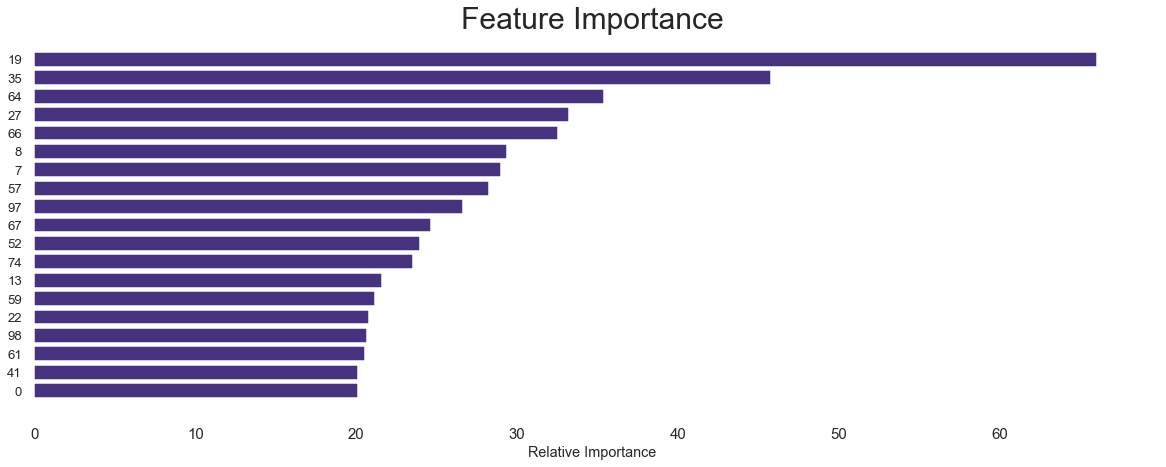

In [15]:
# checking which are the most important features
feature_importance = rfc.fit(univariate_features, y_train).feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-20:-1:1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
sns.despine(left=True, bottom=True)
plt.show()

Our cross validation scores are improved as compared to the baseline above, but we still can see variation in the scores which indicates overfitting.  

<!--Logistic Regression Public Leaderboard Score: 0.676-->

<a id = "6"></a>

### <span style="color:#0b486b">1.6 Recursive Feature Elimination</span>

Recursive feature selection works by eliminating the least important features. It continues recursively until the specified number of features is reached. Recursive elimination can be used with any model that assigns weights to features, either through coef_ or feature\_importances_ . 
  
Here we will use Random Forest to select the 100 best features:

In [16]:
# feature extraction
rfe = feature_selection.RFE(lr, n_features_to_select=100)

# fit on train set
fit = rfe.fit(X_train, y_train)

# transform train set
recursive_features = fit.transform(X_train)

In [17]:
lr = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=10)

lr_scores = cross_val_score(lr, recursive_features, y_train, cv=5, scoring='roc_auc')
rfc_scores = cross_val_score(rfc, recursive_features, y_train, cv=5, scoring='roc_auc')

print('LR Scores: ', lr_scores)
print('RFC Scores: ', rfc_scores)

LR Scores:  [0.99826389 0.99652778 0.984375   1.         0.99652778]
RFC Scores:  [0.78125    0.78559028 0.66840278 0.71961806 0.52777778]


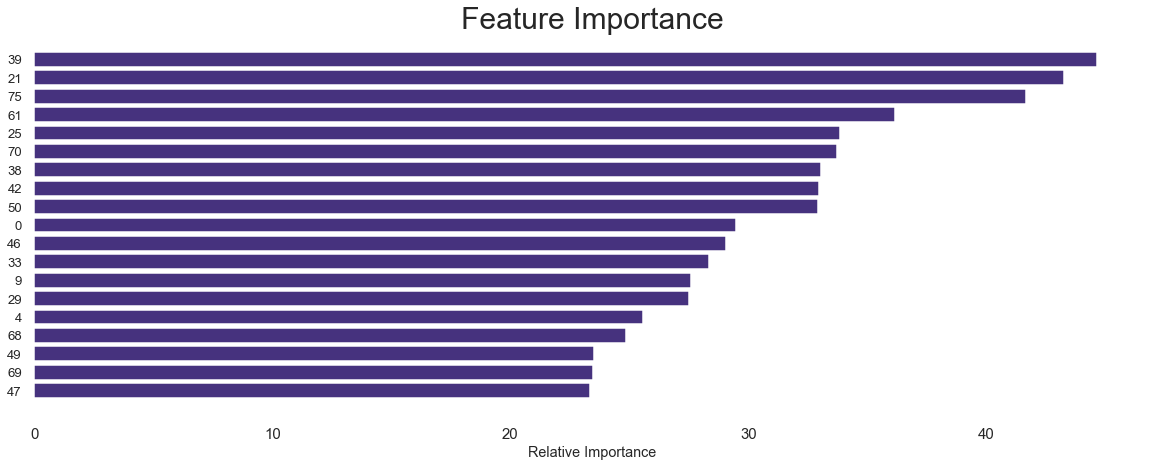

In [18]:
# checking which are the most important features
feature_importance = rfc.fit(recursive_features, y_train).feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-20:-1:1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
sns.despine(left=True, bottom=True)
plt.show()

<!--Logistic Regression Public Leaderboard Score: 0.667 -->

<a id = "7"></a>

### <span style="color:#0b486b">1.7 Feature selection using SelectFromModel</span>

Like recursive feature selection, sklearn's SelectFromModel is used with any estimator that has a coef_ or feature\_importances_ attribute. It removes features with values below a set threshold.

In [19]:
# feature extraction
select_model = feature_selection.SelectFromModel(lr)

# fit on train set
fit = select_model.fit(X_train, y_train)

# transform train set
model_features = fit.transform(X_train)

In [20]:
lr = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=100)

lr_scores = cross_val_score(lr, model_features, y_train, cv=5, scoring='roc_auc')
rfc_scores = cross_val_score(rfc, model_features, y_train, cv=5, scoring='roc_auc')

print('LR Scores: ', lr_scores)
print('RFC Scores: ', rfc_scores)

LR Scores:  [0.984375   0.99479167 0.97222222 0.99305556 0.99305556]
RFC Scores:  [0.71788194 0.83767361 0.71267361 0.82552083 0.734375  ]


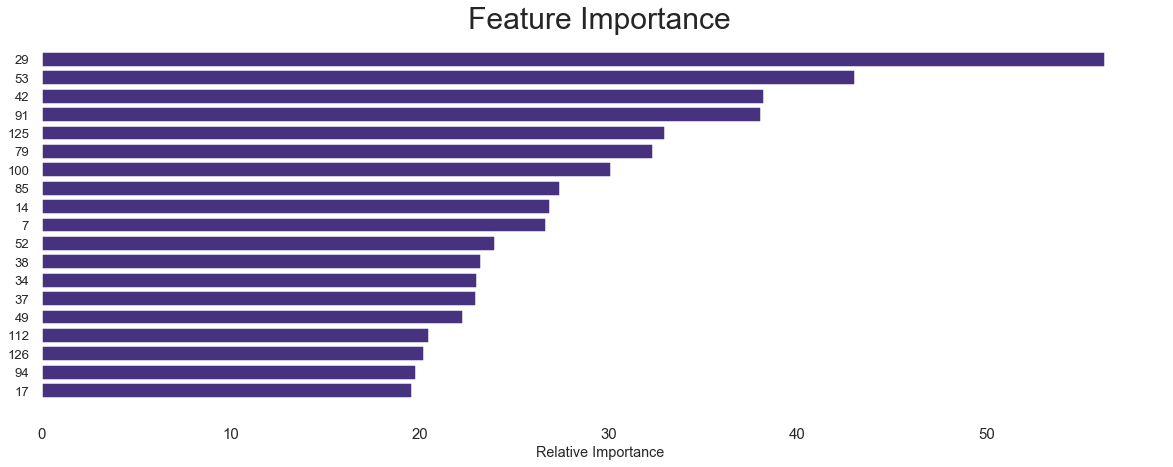

In [21]:
# checking which are the most important features
feature_importance = rfc.fit(model_features, y_train).feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-20:-1:1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
sns.despine(left=True, bottom=True)
plt.show()

<a id = "8"></a>

### <span style="color:#0b486b">1.8 PCA</span>

PCA (Principle Component Analysis) is a dimensionality reduction technique that projects the data into a lower dimensional space. While there are many effective dimensionality reduction techniques, PCA is the only example we will explore here. PCA can be useful in many situations, but especially in cases with excessive multicollinearity or explanation of predictors is not a priority. For detailes of PCA, please see below section 2 of the lab.  

In [22]:
from sklearn.decomposition import PCA
# pca - keep 90% of variance
pca = PCA(0.90)

principal_components = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data = principal_components)
principal_df.shape

(250, 139)

In [23]:
lr = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=100)

lr_scores = cross_val_score(lr, principal_df, y_train, cv=5, scoring='roc_auc')
rfc_scores = cross_val_score(rfc, principal_df, y_train, cv=5, scoring='roc_auc')

print('LR Scores: ', lr_scores)
print('RFC Scores: ', rfc_scores)

LR Scores:  [0.80902778 0.703125   0.734375   0.80555556 0.66145833]
RFC Scores:  [0.60850694 0.69184028 0.62326389 0.52951389 0.66753472]


In [24]:
# pca keep 75% of variance
pca = PCA(0.75)
principal_components = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data = principal_components)
principal_df.shape

(250, 93)

In [25]:
lr = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=100)

lr_scores = cross_val_score(lr, principal_df, y_train, cv=5, scoring='roc_auc')
rfc_scores = cross_val_score(rfc, principal_df, y_train, cv=5, scoring='roc_auc')

print('LR Scores: ', lr_scores)
print('RFC Scores: ', rfc_scores)

LR Scores:  [0.72048611 0.60069444 0.68402778 0.71006944 0.61284722]
RFC Scores:  [0.51302083 0.5703125  0.72222222 0.63454861 0.64322917]


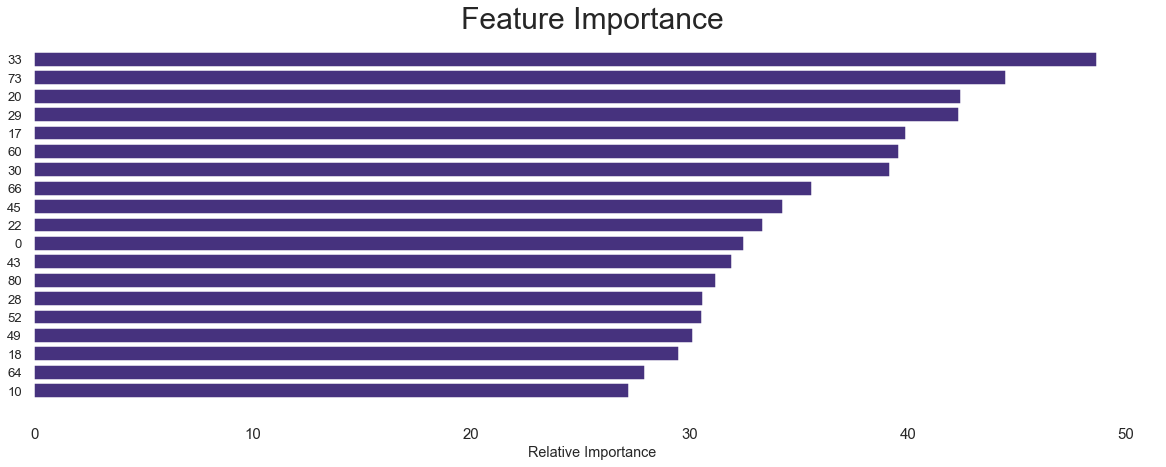

In [26]:
# checking which are the most important features
feature_importance = rfc.fit(principal_df, y_train).feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-20:-1:1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
sns.despine(left=True, bottom=True)
plt.show()

Recursive feature selection appears to perform the best above.

In [27]:
# feature extraction
rfe = feature_selection.RFE(lr, n_features_to_select=100)

# fit on train set
fit = rfe.fit(X_train, y_train)

# transform train set
recursive_X_train = fit.transform(X_train)
recursive_X_test = fit.transform(X_test)

lr = LogisticRegression(C=1, class_weight={1:0.6, 0:0.4}, penalty='l1', solver='liblinear')
lr_scores = cross_val_score(lr, recursive_X_train, y_train, cv=5, scoring='roc_auc')
lr_scores.mean()

0.9059027777777778

In [28]:
predictions = lr.fit(recursive_X_train, y_train).predict_proba(recursive_X_test)

In [52]:
submission = pd.read_csv('./data/sample_submission.csv')
submission['target'] = predictions
submission.to_csv('submission.csv', index=False)
submission.head()

,id,target
0,250,0.270187
1,251,0.401509
2,252,0.144925
3,253,0.003878
4,254,0.177666


---
## <span style="color:#0b486b">2. Dimensionality Reduction and PCA</span>

We will be looking at Principal Component Analysis <b>PCA</b>, which is an extremely useful linear dimensionality reduction technique.

---
<a id = "pca"></a>

### <span style="color:#0b486b">2.1 Principal Component Analysis</span>

We'll start with our standard set of initial imports:



In [1]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

Principal Component Analysis is a very powerful unsupervised method for *dimensionality reduction* in data.  It's easiest to visualize by looking at a two-dimensional dataset:

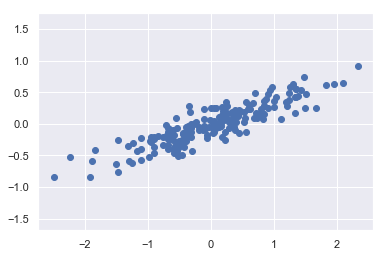

In [2]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

We can see that there is a definite trend in the data. What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution:

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


To see what these numbers mean, let's view them as vectors plotted on top of the data:

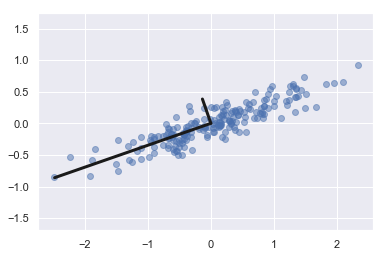

In [5]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [6]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

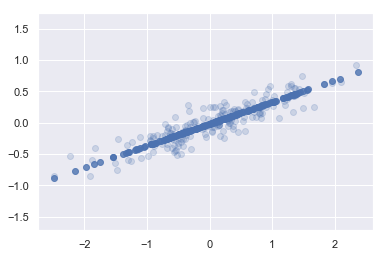

In [7]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.

### Application of PCA to Digits

The dimensionality reduction might seem a bit abstract in two dimensions, but the projection and dimensionality reduction can be extremely useful when visualizing high-dimensional data.  Let's take a quick look at the application of PCA to the digits data we looked at before:

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [9]:
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


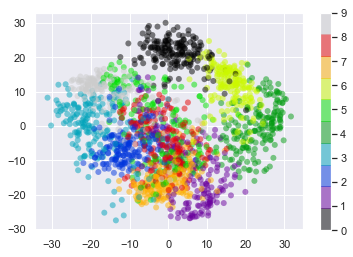

In [10]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

This gives us an idea of the relationship between the digits. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits, **without reference** to the labels.

### What do the Components Mean?

PCA is a very useful dimensionality reduction algorithm, because it has a very intuitive interpretation via *eigenvectors*.
The input data is represented as a vector: in the case of the digits, our data is

$$
x = [x_1, x_2, x_3 \cdots]
$$

but what this really means is

$$
image(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots
$$

If we reduce the dimensionality in the pixel space to (say) 6, we recover only a partial image:

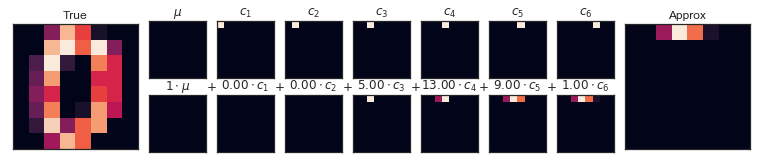

In [18]:
#download the fig_code zipped file (from week 6 or 8 folder on clouddeakin) and unzip the folder in the same folder as your .py file
from fig_code.figures import plot_image_components

sns.set_style('white')
plot_image_components(digits.data[0])

But the pixel-wise representation is not the only choice. We can also use other *basis functions*, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

What PCA does is to choose optimal **basis functions** so that only a few are needed to get a reasonable approximation.
The low-dimensional representation of our data is the coefficients of this series, and the approximate reconstruction is the result of the sum:

In [19]:
from fig_code.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

interactive(children=(IntSlider(value=0, description='i', max=1796), Output()), _dom_classes=('widget-interact…

Here we see that with only six PCA components, we recover a reasonable approximation of the input! (To view the output, load the .ipynb in Jupyter)

Thus we see that PCA can be viewed from two angles. It can be viewed as **dimensionality reduction**, or it can be viewed as a form of **lossy data compression** where the loss favors noise. In this way, PCA can be used as a **filtering** process as well.

### Choosing the Number of Components

But how much information have we thrown away?  We can figure this out by looking at the **explained variance** as a function of the components:

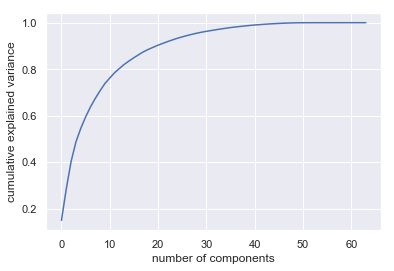

In [13]:
sns.set()
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### PCA as data compression

As we mentioned, PCA can be used for is a sort of data compression. Using a small ``n_components`` allows you to represent a high dimensional point as a sum of just a few principal vectors.

Here's what a single digit looks like as you change the number of components:

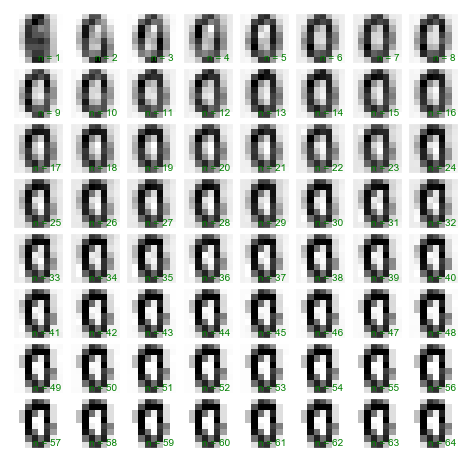

In [12]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Let's take another look at this by using IPython's ``interact`` functionality to view the reconstruction of several images at once: (To view the output, load the .ipynb in Jupyter)

In [17]:
from ipywidgets import interact

def plot_digits(n_components):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im)
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
                 size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=[1, 32, 64], nside=[1, 8]);

interactive(children=(Dropdown(description='n_components', options=(1, 32, 64), value=1), Output()), _dom_clas…

<a id = "others"></a>

### <span style="color:#0b486b">2.2 Other Dimensionality Reducting Routines</span> 

Note that scikit-learn contains many other unsupervised dimensionality reduction routines: some you might wish to try are
Other dimensionality reduction techniques which are useful to know about:

- [sklearn.decomposition.PCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.PCA.html): 
   Principal Component Analysis
- [sklearn.decomposition.RandomizedPCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.RandomizedPCA.html):
   extremely fast approximate PCA implementation based on a randomized algorithm
- [sklearn.decomposition.SparsePCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.SparsePCA.html):
   PCA variant including L1 penalty for sparsity
- [sklearn.decomposition.FastICA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.FastICA.html):
   Independent Component Analysis
- [sklearn.decomposition.NMF](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.NMF.html):
   non-negative matrix factorization
- [sklearn.manifold.LocallyLinearEmbedding](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html):
   nonlinear manifold learning technique based on local neighborhood geometry
- [sklearn.manifold.IsoMap](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.Isomap.html):
   nonlinear manifold learning technique based on a sparse graph algorithm
   
Each of these has its own strengths & weaknesses, and areas of application. You can read about them on the [scikit-learn website](http://sklearn.org).

# <span style="color:#0b486b">Tasks</span>

Try the provided examples and get yourself familiar with sample code before attempting portolio tasks.

Please show your attempt to your tutor before you leave the lab, or email your files to your coordinator if you are an off-campus student.


# <span style="color:#0b486b">Summary</span>

In this session we have covered: 
 - feature selection and dimensionality reduction methods.
 - how to apply the methods to select feature and reduce dimensionality in Python.

# <span style="color:#0b486b">Acknowledgement</span>

- The PCA part was put together by [Jake Vanderplas](http://www.vanderplas.com) for PyCon 2015. Source and license info is on [GitHub](https://github.com/jakevdp/sklearn_pycon2015/).

- Feature Selection and Dimensionality Reduction, by Tara Boyle, on [Kaggle.com](https://www.kaggle.com/tboyle10/feature-selection/data).
